In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
%matplotlib inline

In [2]:
rc('font', family='Comic Sans MS')

,f[Hz],Uwy[V],dUwy[V],ku[V/V],dku[V/V],ku[dB],dku[dB]
0,10.0,1.700,0.006100,10.62500,0.105417,20.526579,0.086178
1,20.0,1.700,0.006100,10.62500,0.105417,20.526579,0.086178
2,50.0,1.500,0.005500,9.37500,0.093283,19.439426,0.086427
3,100.0,1.200,0.004600,7.50000,0.075096,17.501225,0.086970
4,200.0,0.760,0.003280,4.75000,0.048485,13.533872,0.088659
5,500.0,0.330,0.001990,2.06250,0.022774,6.287879,0.095910
6,1000.0,0.170,0.001510,1.06250,0.013626,0.526579,0.111389
7,10000.0,0.017,0.001051,0.10625,0.006642,-19.473421,0.542970


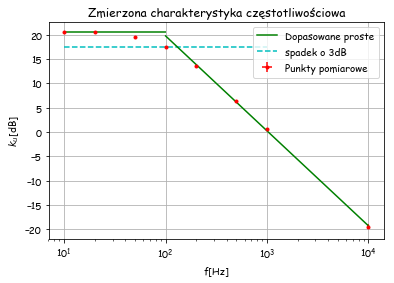

In [34]:
charakterystyka = pd.read_csv('charakterystyka.csv')
Uwe = 160e-3 # w Woltach
dUwe = Uwe * 0.003 + 1e-3
charakterystyka['dUwy[V]'] = charakterystyka['Uwy[V]'] * 0.003 + 0.001
charakterystyka['ku[V/V]'] = charakterystyka['Uwy[V]']/Uwe
charakterystyka['dku[V/V]'] = np.sqrt((charakterystyka['dUwy[V]']/Uwe)**2+(charakterystyka['Uwy[V]']*dUwe/Uwe**2)**2)
charakterystyka['ku[dB]'] = 20*np.log10(charakterystyka['ku[V/V]'])
charakterystyka['dku[dB]'] = 20 * charakterystyka['dku[V/V]'] / np.log(10) / charakterystyka['ku[V/V]']
plt.errorbar(charakterystyka['f[Hz]'],charakterystyka['ku[dB]'],charakterystyka['dku[dB]'],0,'r.',label='Punkty pomiarowe')
plt.xscale('log')
plt.xlabel('f[Hz]')
plt.ylabel(r'$k_u$[dB]') 
plaska = np.polyfit(np.log10(charakterystyka['f[Hz]'][:3]),charakterystyka['ku[dB]'][:3],1)
# plt.plot(charakterystyka['f[Hz]'][:4],np.polyval(plaska,np.log10(charakterystyka['f[Hz]'][:4])),'g')
plt.hlines(20.52,10,1e2,'g')
plt.hlines(17.52,10,1e3,'c','dashed',label='spadek o 3dB')
prosta = np.polyfit(np.log10(charakterystyka['f[Hz]'][-4:]),charakterystyka['ku[dB]'][-4:],1)
plt.plot(charakterystyka['f[Hz]'][-5:],np.polyval(prosta,np.log10(charakterystyka['f[Hz]'][-5:])),'g',label='Dopasowane proste')
plt.title('Zmierzona charakterystyka częstotliwościowa')
plt.legend()
plt.grid()
plt.savefig('Aproksymacja.png',dpi=300)
# print('Nachylenie: {:.3f} +/- {:.3}'.format(prosta[0],np.sqrt(cov[0,0])))
# cov
plaska[0]
charakterystyka

In [60]:
a, b = [4, 5]


0.051

In [ ]:
# prosta, cov = np.polyfit(np.log10(charakterystyka['f[Hz]'][-5:]),charakterystyka['ku[dB]'][-5:],1,cov=True)
# np.log10(charakterystyka['f[Hz]'][-4:]), charakterystyka['ku[dB]'][-4:]
# prosta, np.diag(np.sqrt(cov))

In [29]:
np.__version__

'1.13.3'

In [30]:
def ku(f, R1 = 1e4,R2 = 1e5,C = 15e-9):
    omega = f*2*np.pi
    k = R2/(R1*np.sqrt(1+(omega*R2*C)**2))
    return 20*np.log10(k)

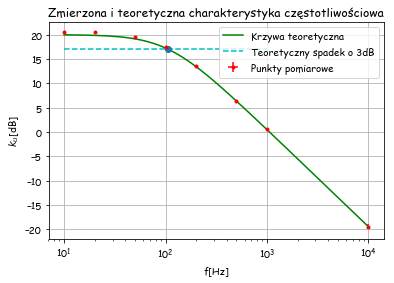

In [74]:
f = np.logspace(1,4,1000)
plt.plot(f,ku(f),'g',label='Krzywa teoretyczna')
plt.xscale('log')
plt.errorbar(charakterystyka['f[Hz]'],charakterystyka['ku[dB]'],charakterystyka['dku[dB]'],0,'r.',label='Punkty pomiarowe')
plt.xlabel('f[Hz]')
plt.ylabel(r'$k_u$[dB]') 
plt.grid()
plt.hlines(17,10,1e3,'c','dashed',label='Teoretyczny spadek o 3dB')
plt.plot(106,17,'o')
plt.title('Zmierzona i teoretyczna charakterystyka częstotliwościowa')
plt.legend()
plt.savefig('Teoria.png',dpi=300)
roznica = np.abs(ku(charakterystyka['f[Hz]'])-charakterystyka['ku[dB]'])

In [21]:
pikna_tabelka_do_sprawozdania = pd.DataFrame()
pikna_tabelka_do_sprawozdania['f[Hz]'] = charakterystyka['f[Hz]']
pikna_tabelka_do_sprawozdania['ku[V/V]'] = charakterystyka['ku[V/V]']
pikna_tabelka_do_sprawozdania['delta ku[V/V]'] = charakterystyka['dku[V/V]']
pikna_tabelka_do_sprawozdania['kU[dB]'] = charakterystyka['ku[dB]']
pikna_tabelka_do_sprawozdania['delta ku[dB]'] = charakterystyka['dku[dB]']
mapper =  {'f[Hz]': '{0:.0f}',
           'ku[V/V]': '{0:.2f}',
           'delta ku[V/V]': '{0:.3f}',
           'kU[dB]': '{0:.2f}',
           'delta ku[dB]': '{0:.3f}'}

pikna_tabelka_do_sprawozdania = pikna_tabelka_do_sprawozdania.style.format(mapper)
pikna_tabelka_do_sprawozdania
roznica = np.abs(ku(charakterystyka['f[Hz]'])-charakterystyka['ku[dB]'])

,f[Hz],ku[V/V],delta ku[V/V],kU[dB],delta ku[dB]
0,10,10.62,0.105,20.53,0.086
1,20,10.62,0.105,20.53,0.086
2,50,9.38,0.093,19.44,0.086
3,100,7.50,0.075,17.50,0.087
4,200,4.75,0.048,13.53,0.089
5,500,2.06,0.023,6.29,0.096
6,1000,1.06,0.014,0.53,0.111
7,10000,0.11,0.007,-19.47,0.543


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,U[V],I[A],wtornik,I[mA],dU[V],dI[mA]
0,3.550,0.000000,0,0.000,0.020650,0.000000
1,0.488,0.000488,0,0.488,0.011464,0.000027
2,3.550,0.000000,1,0.000,0.020650,0.000000
3,3.550,0.003550,1,3.550,0.020650,0.000179


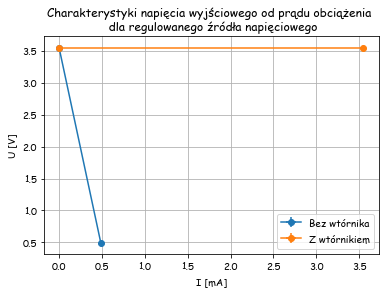

In [79]:
wtorniki = pd.read_csv('prad_obciazenia.csv')
wtorniki['I[mA]'] = wtorniki['I[A]']*1e3 
wtorniki['dU[V]'] = wtorniki['U[V]']*0.003 + 0.01
# wtorniki['dU[V]'][2] = -0.01+0.001
R = 1000
dR = R*0.05
wtorniki['dI[mA]'] = 0
wtorniki['dI[mA]'][wtorniki['I[mA]'] > 0] = np.sqrt((wtorniki['dU[V]'][wtorniki['I[mA]'] > 0]/R)**2+(dR*wtorniki['U[V]'][wtorniki['I[mA]']> 0]/R**2)**2)
bezWtornika = wtorniki[wtorniki['wtornik'] == 0]
zWtornikiem = wtorniki[wtorniki['wtornik'] == 1]
plt.errorbar(bezWtornika['I[mA]'],bezWtornika['U[V]'],bezWtornika['dU[V]'],0,'o-',label='Bez wtórnika')
plt.errorbar(zWtornikiem['I[mA]'],zWtornikiem['U[V]'],zWtornikiem['dU[V]'],0,'o-',label='Z wtórnikiem')
plt.ylabel('U [V]')
plt.xlabel(r'I [mA]')
plt.grid()
plt.legend()
plt.title('Charakterystyki napięcia wyjściowego od prądu obciążenia \n dla regulowanego źródła napięciowego')
plt.savefig('Wtorniki.png',dpi = 300)
opor = np.polyfit(bezWtornika['I[mA]'],bezWtornika['U[V]'],1)
R = (3.55-0.488)/0.488
wtorniki

(2, 5)

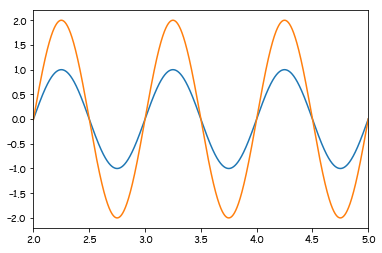

In [58]:
t = np.linspace(0,10,int(1e4)) #w milisekundach
sinus = np.sin(t*2*np.pi)
plt.plot(t,sinus)
plt.plot(t,2*sinus)
plt.xlim(2,5)
plt.xlabel('t[ms]')
plt.ylabel('U[V]')
